In [1]:
import ISRAnalysis as an

Welcome to JupyROOT 6.14/04


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
binDef = "_FineCoarse"
detUnfold_muon_2016 = an.ISRAnalysis("2016", "muon", False, "matrix", 
                                     "Detector_Dressed_DRp1_Fiducial", "Detector_Dressed_DRp1", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DRp1_Fiducial/Pt_ResMatrix_Detector_Dressed_DRp1_FineCoarse/Rec_Pt
Gen_binName: Detector_Dressed_DRp1_Fiducial/Pt_ResMatrix_Detector_Dressed_DRp1_FineCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 40
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
Detector_Dressed_DRp1_Fiducial/Pt_ResMatrix_Detector_Dressed_DRp1_FineCoarse/hmcPtGenRec
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Detector_Dressed_DRp1_Fiducial/Mass_ResMatrix_Detector_Dressed_DRp1_FineCoarse/Rec_Mass
Gen_binName: Detector_Dressed_DRp1_Fiducial/Mass_ResMatrix_Detector_Dressed_DRp1_FineCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.
Detector_Dressed_DRp1_Fiducial/Mass_ResMatrix_Detector_Dressed_DRp1_FineCoarse/hmcMassGenRec


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [4]:
sigma = detUnfold_muon_2016.checkMatrixCond()

Decompose(), successed? 1
Mass, Cond(): 3.43161

In [5]:
detUnfold_muon_2016.checkMatrixCond("Pt")

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x64744f8>

Decompose(), successed? 1
Pt, Cond(): 5.83822

In [6]:
# Nominal
detUnfold_muon_2016.setInputHist(False, False, None, "Detector")
detUnfold_muon_2016.setUnfoldBkgs(False, "Detector")
detUnfold_muon_2016.subFake() # Subract DY fake (out of fiducial volume at gen level)

In [7]:
#systematics = {"ID":["IdSFUp", "IdSFDown"], "ISO":["IsoSFUp", "IsoSFDown"], "TRG":["trgSFUp", "trgSFDown"], 
#              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}
#              #"Fake":["FakeUp", "FakeDown"]}
    
systematics = {"ID":["IdSFUp", "IdSFDown"], "TRG":["trgSFUp", "trgSFDown"], 
              "PU":["PUUp", "PUDown"], "Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleBUp", "ScaleBUp", "ScaleBDown"], "AlphaS":["AlphaSUp", "AlphaSDown"],
              "LepMom": ["NoLepMomCorr", "Nominal"]}

#systematics = {"Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleBUp", "ScaleBUp", "ScaleBDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        detUnfold_muon_2016.setSystematics(sysName, postfix)

for sysName, postfixs in systematics.items():
    for postfix in postfixs:
        print(sysName + " " + postfix)
        detUnfold_muon_2016.setInputHist(False, False, None, "Detector", True, sysName, postfix)
        detUnfold_muon_2016.setUnfoldBkgs(True, "Detector", sysName, postfix)

        detUnfold_muon_2016.subFake(True, sysName,postfix)

ID IdSFUp
ID IdSFDown
TRG trgSFUp
TRG trgSFDown
PU PUUp
PU PUDown
Scale ScaleABUp
Scale ScaleABDown
Scale ScaleAUp
Scale ScaleBUp
Scale ScaleBUp
Scale ScaleBDown
AlphaS AlphaSUp
AlphaS AlphaSDown
LepMom NoLepMomCorr
LepMom Nominal
Detector_NoLepMomCorr/Pt_FineCoarse/histo_WJets_MG
Detector_NoLepMomCorr/Pt_FineCoarse/histo_WW_pythia
Detector_NoLepMomCorr/Pt_FineCoarse/histo_WZ_pythia
Detector_NoLepMomCorr/Pt_FineCoarse/histo_ZZ_pythia
Detector_NoLepMomCorr/Pt_FineCoarse/histo_DYJets10to50ToTauTau
Detector_NoLepMomCorr/Pt_FineCoarse/histo_DYJetsToTauTau
Detector_NoLepMomCorr/Pt_FineCoarse/histo_TTLL_powheg
detector_level_DY_Fake_NoLepMomCorr/Pt_FineCoarse/histo_DYJets
detector_level_DY_Fake_NoLepMomCorr/Pt_FineCoarse/histo_DYJets10to50
Detector/Pt_FineCoarse/histo_WJets_MG
Detector/Pt_FineCoarse/histo_WW_pythia
Detector/Pt_FineCoarse/histo_WZ_pythia
Detector/Pt_FineCoarse/histo_ZZ_pythia
Detector/Pt_FineCoarse/histo_DYJets10to50ToTauTau
Detector/Pt_FineCoarse/histo_DYJetsToTauTau
Detecto

Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 126 input bins and 70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding 

In [8]:
detUnfold_muon_2016.doUnfold()
detUnfold_muon_2016.doUnfold(True)

Do systematic unfold!
Unfold for AlphaS systematic.
2 systematic variation exist.
posfix: AlphaSUp
posfix: AlphaSDown
Unfold for ID systematic.
2 systematic variation exist.
posfix: IdSFUp
posfix: IdSFDown
Unfold for LepMom systematic.
2 systematic variation exist.
posfix: NoLepMomCorr
posfix: Nominal
Unfold for PU systematic.
2 systematic variation exist.
posfix: PUUp
posfix: PUDown
Unfold for Scale systematic.
6 systematic variation exist.
posfix: ScaleABUp
posfix: ScaleABDown
posfix: ScaleAUp
posfix: ScaleBUp
posfix: ScaleBUp
posfix: ScaleBDown
Unfold for TRG systematic.
2 systematic variation exist.
posfix: trgSFUp
posfix: trgSFDown


Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: 

In [9]:
# 
#for sysName, _ in systematics.items():
#    for massBin in range(5):
#        detUnfold_muon_2016.drawDetPlot("Pt"+binDef, "Detector", "pt[UO];mass[UOC"+str(massBin)+"]", True, sysName, "DiPt_M"+str(massBin), massBin, True)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file detector_Mass_FineCoarse.png has been created


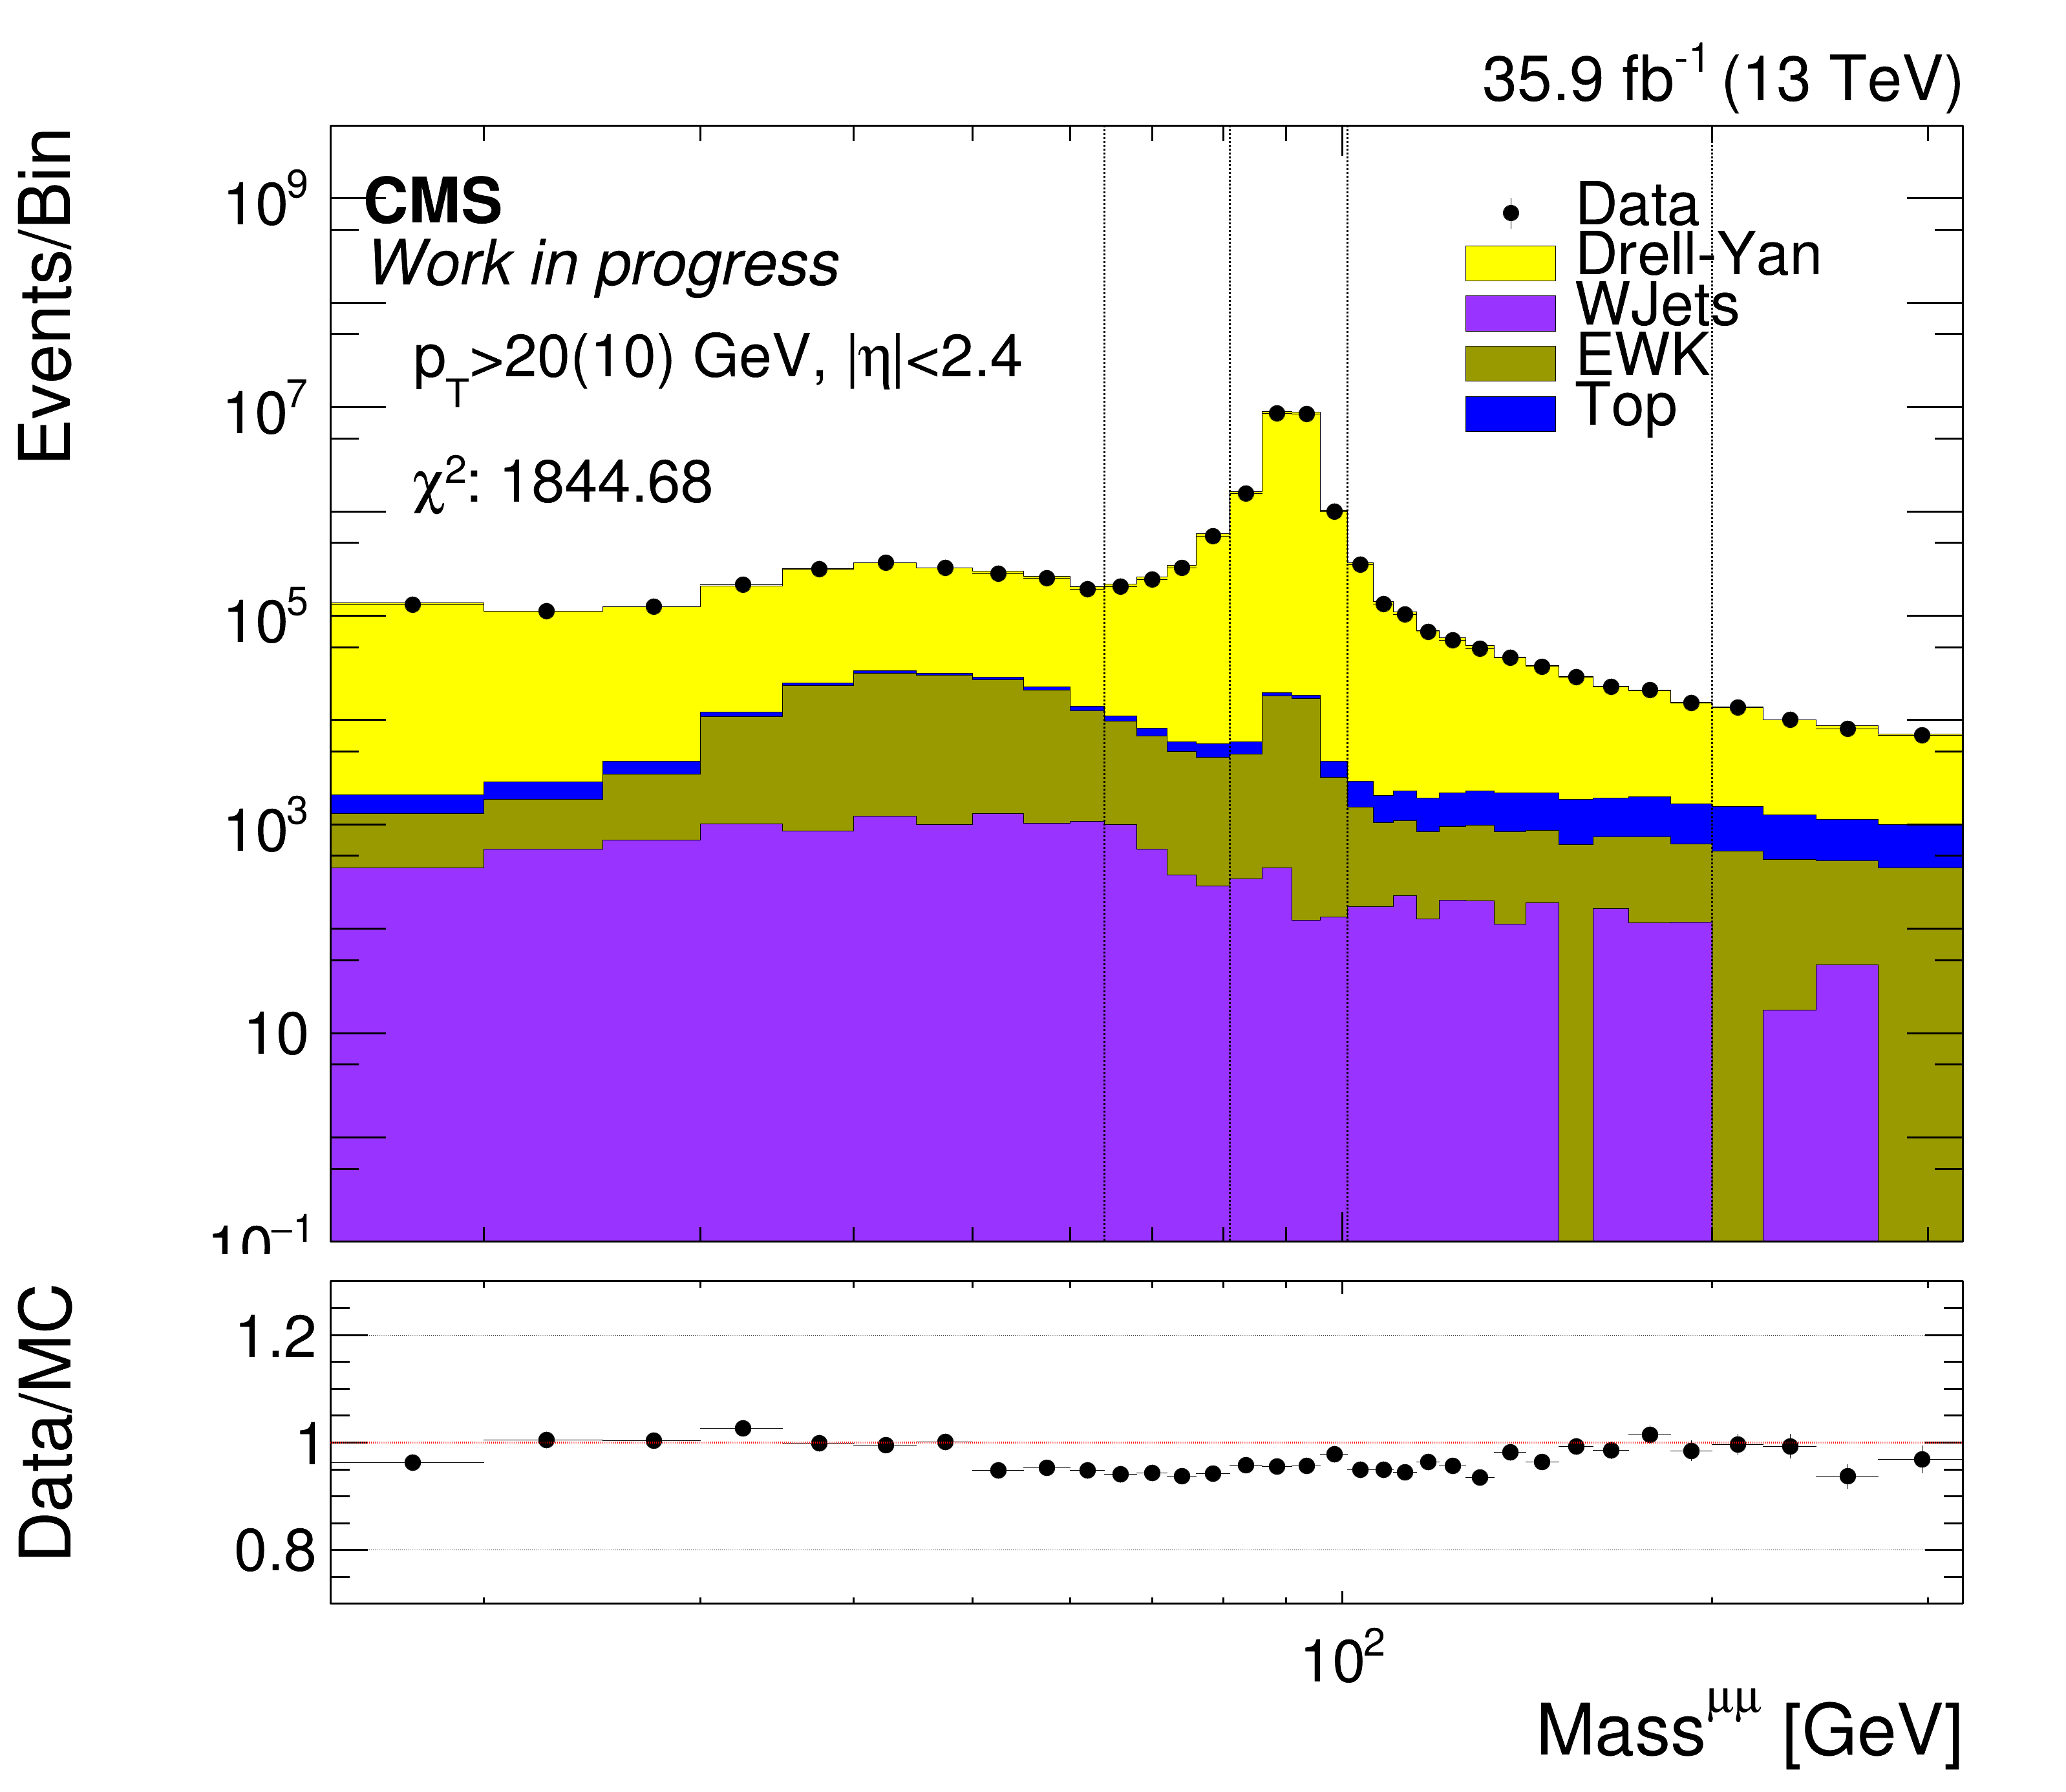

In [10]:
detUnfold_muon_2016.drawDetPlot("Mass"+binDef, "Detector", "mass[UO];pt[UOC0]", True, "")

In [11]:
#for massBin in range(0,5):
#    detUnfold_muon_2016.drawDetPlot("Pt_1D", "Detector_M_"+str(massBin), "", True, "AlphaS", "DiPt_M"+str(massBin)+"1GeVBin", massBin)

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 1628.06


Info in <TCanvas::Print>: png file unfolded_Mass.png has been created


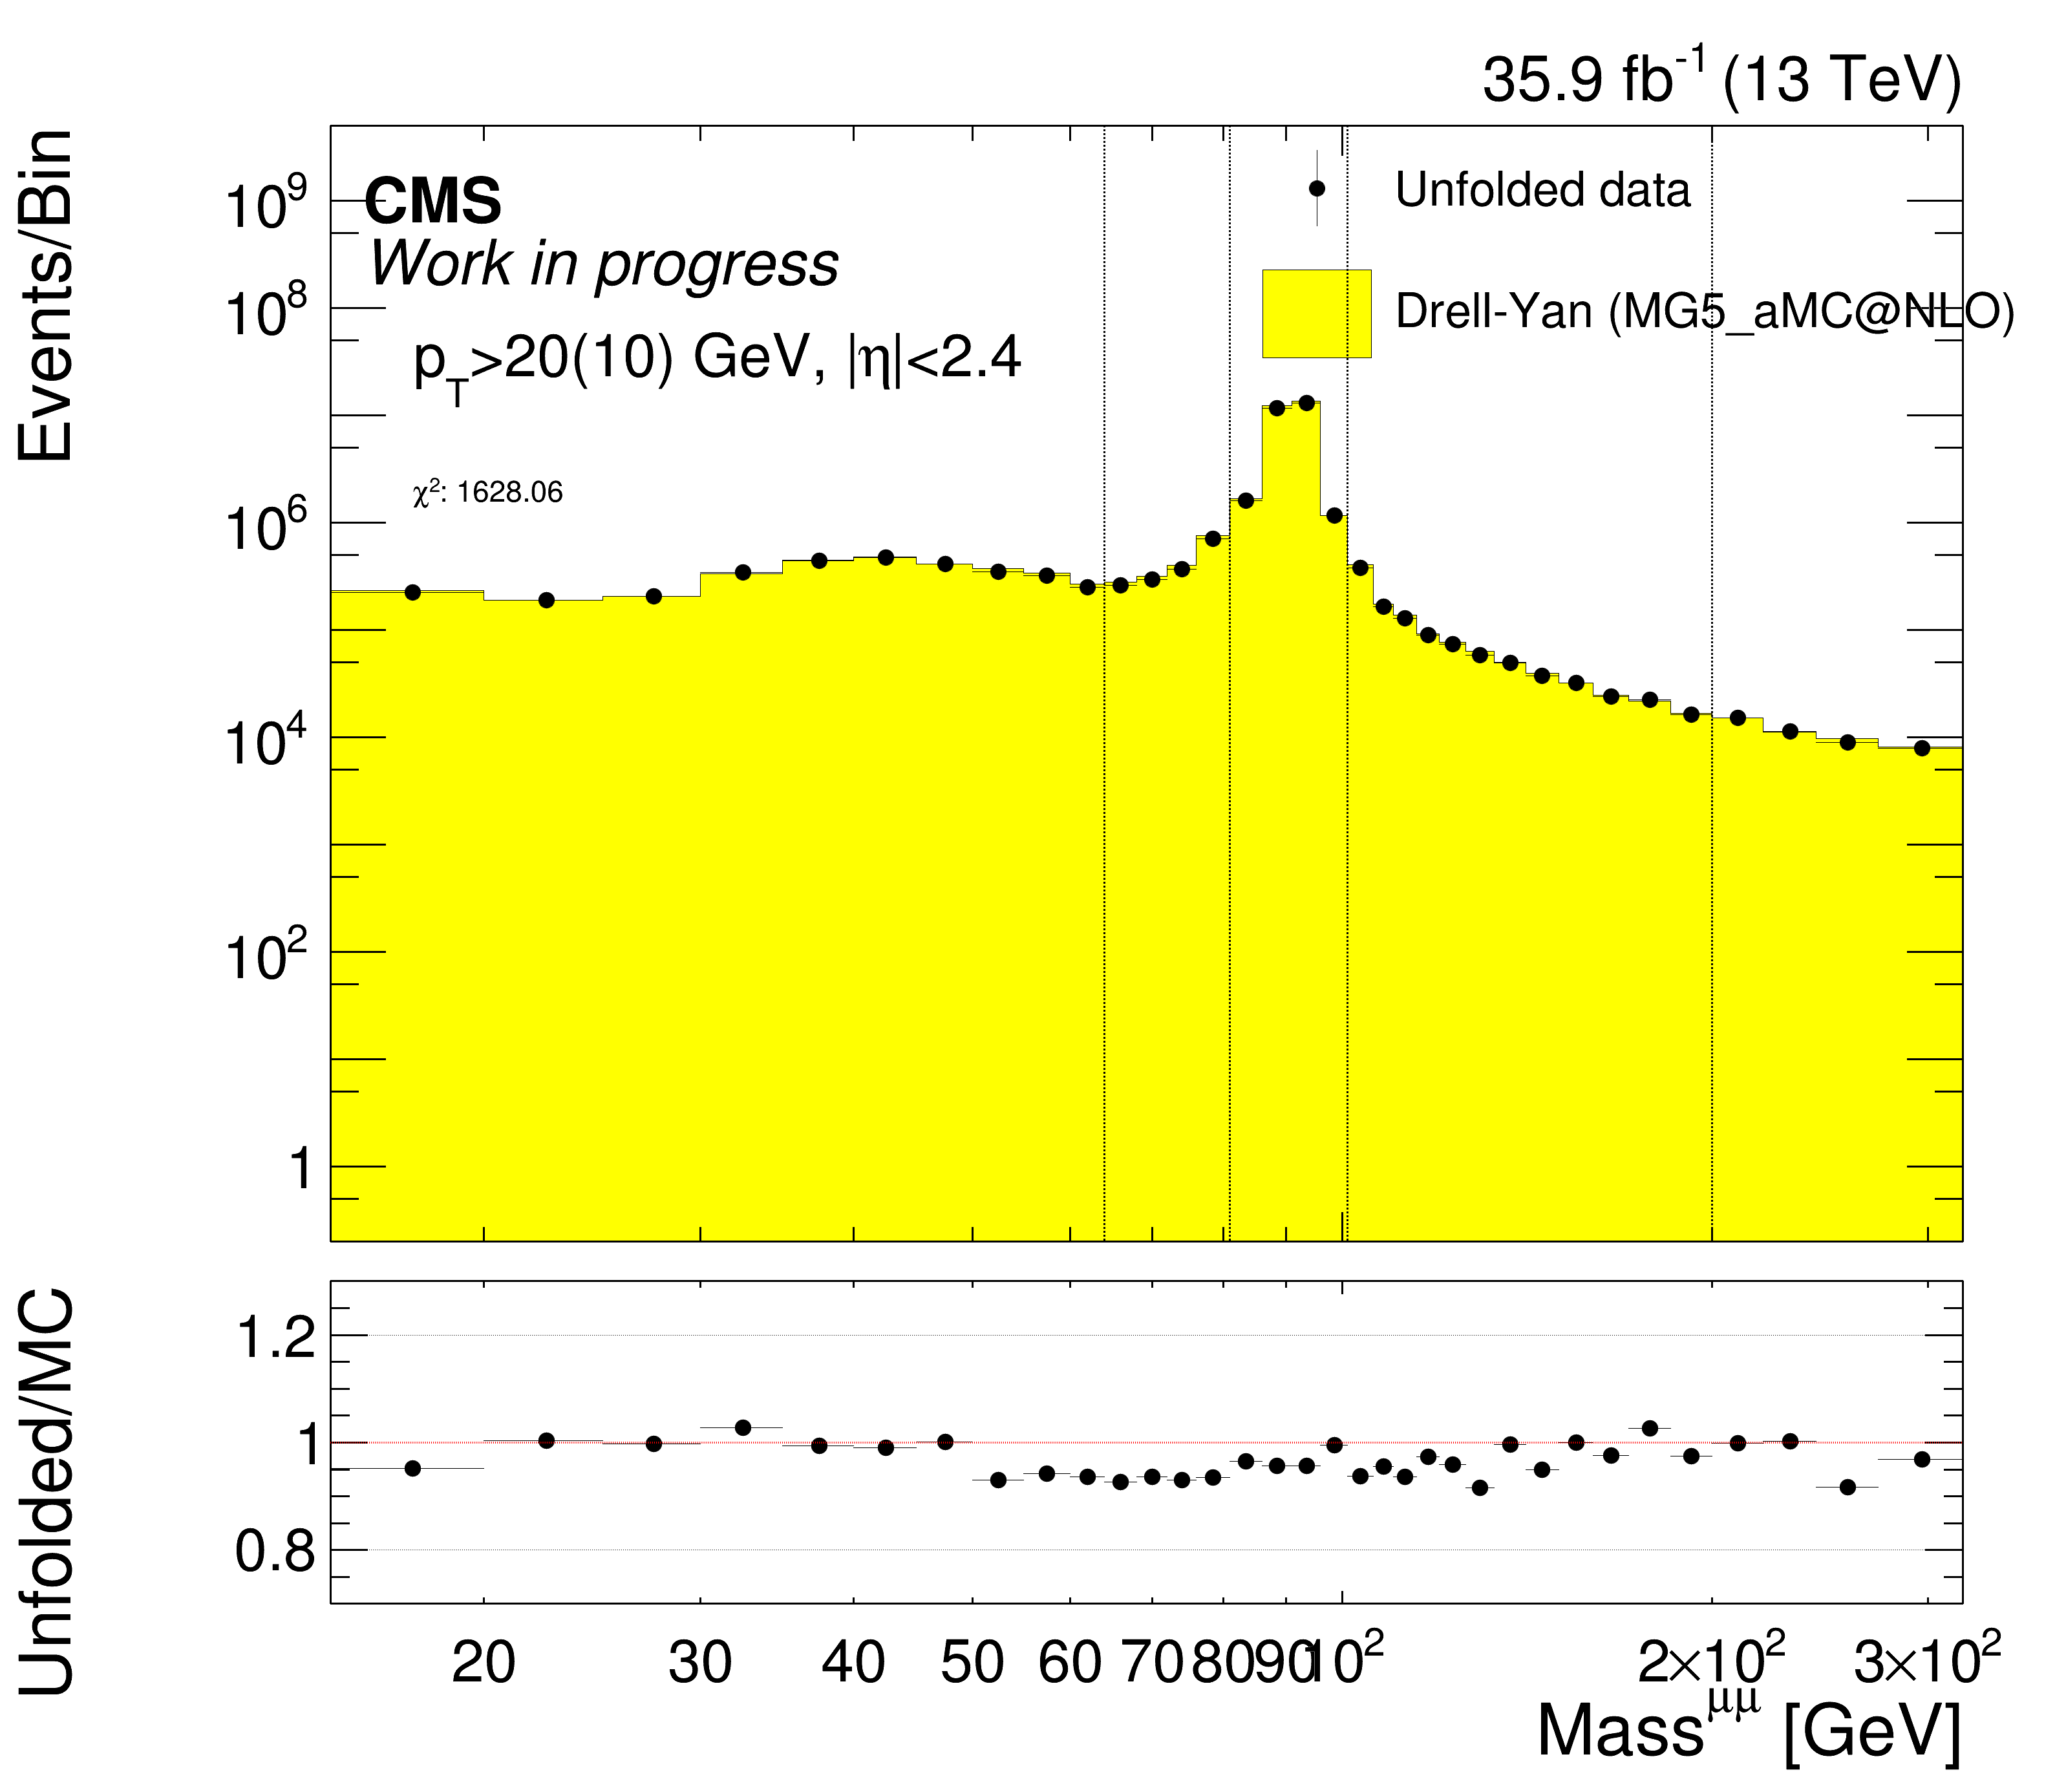

In [12]:
detUnfold_muon_2016.drawUnfPlot("Mass", "mass[UO];pt[UOC0]", True, "")

In [13]:
#detUnfold_muon_2016.drawAcceptPlot("Mass", "mass[UO];pt[UOC0]", True, "", "AcceptanceCorr_Mass")

ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 65.0559
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 828.173
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 984.741
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 584.977
ISRUnfold::drawFoldedHists, Draw plot!
35.9 fb^{-1} (13 TeV)
chi^{2}, 507.641


Info in <TCanvas::Print>: png file UnfDiPt_M0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M3.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: unfolded_level_Pt
Info in <TCanvas::Print>: png file UnfDiPt_M4.png has been created


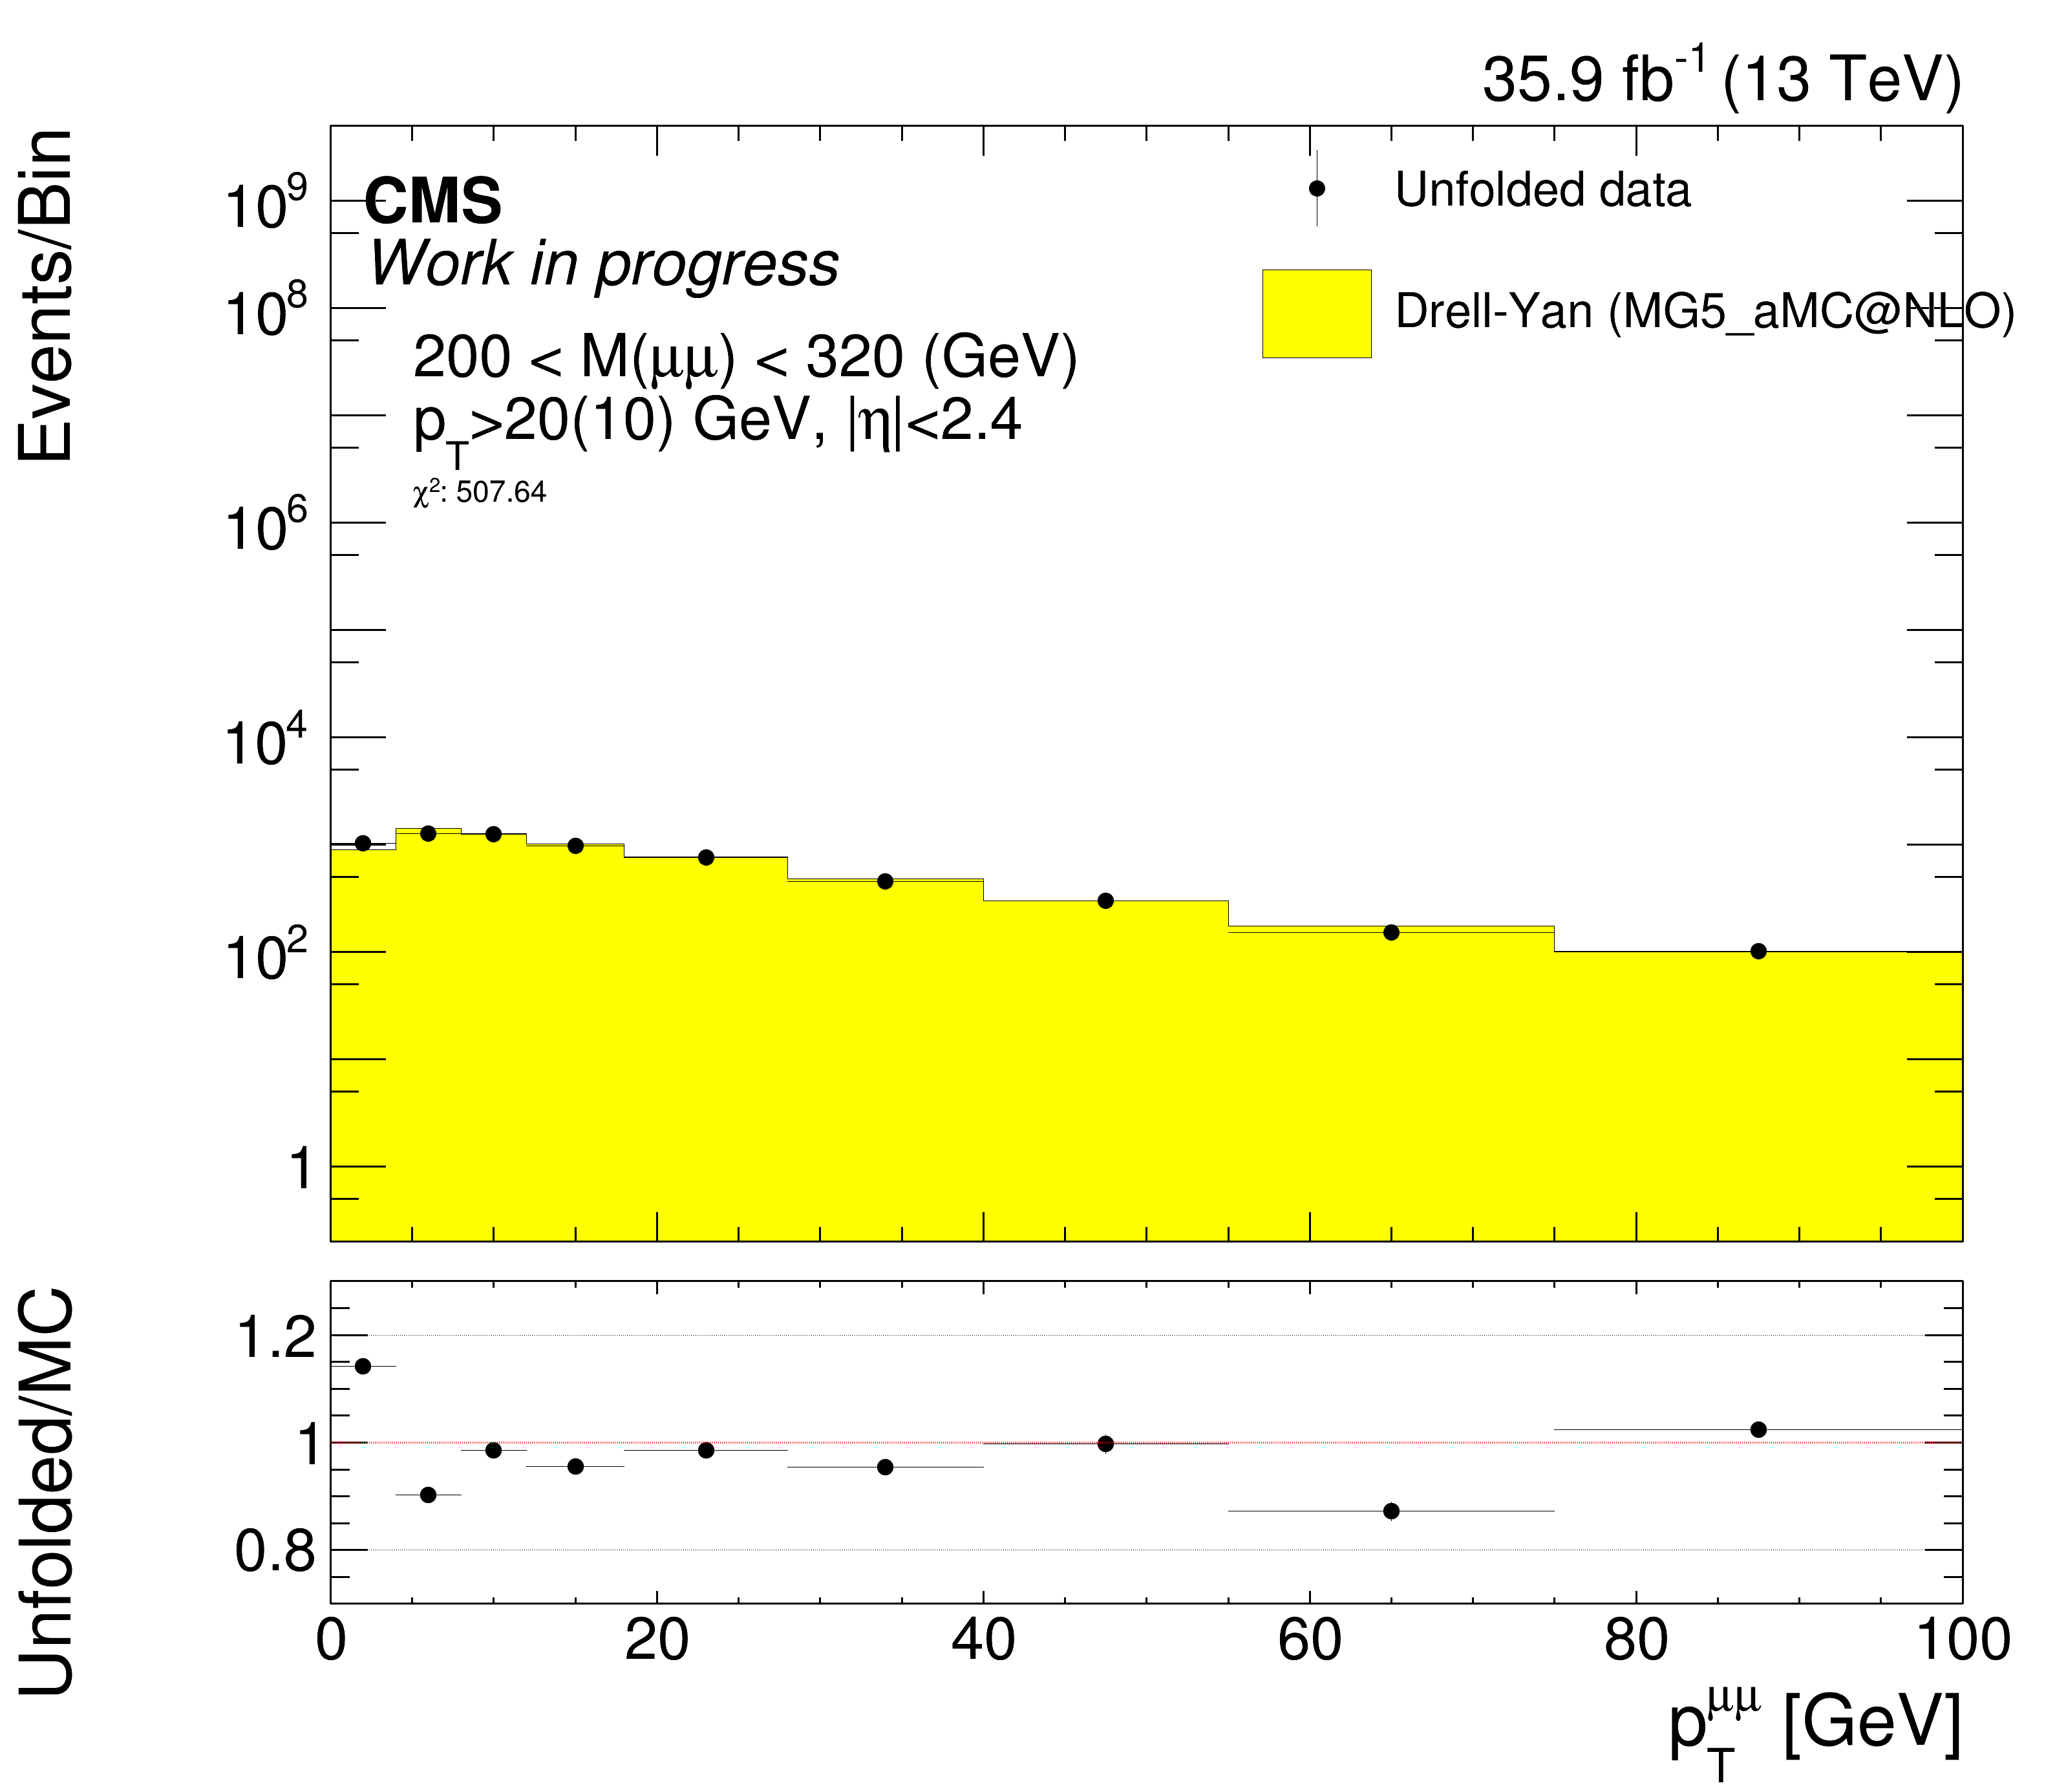

In [14]:
for massBin in range(5):
    detUnfold_muon_2016.drawUnfPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "UnfDiPt_M"+str(massBin), massBin, True)

In [15]:
#for massBin in range(5):
#    detUnfold_muon_2016.drawAcceptPlot("Pt", "pt[UO];mass[UOC"+str(massBin)+"]", True, "", "AcceptPt_M"+str(massBin), massBin, True)

In [16]:
detUnfold_muon_2016.setMeanValues()

ISRUnfold::setMeanMass()   Save mean of dilepton...
ISRUnfold::setMeanPt()   Save mean of dilepton momentum...


In [17]:
detUnfold_muon_2016.setSysMeanValues()

ISRUnfold::setSysMeanMass()   Save mean of dilepton...
Unfold for AlphaS systematic.
2 systematic variation exist.
Unfold for ID systematic.
2 systematic variation exist.
Unfold for LepMom systematic.
2 systematic variation exist.
Unfold for PU systematic.
2 systematic variation exist.
Unfold for Scale systematic.
6 systematic variation exist.
Unfold for TRG systematic.
2 systematic variation exist.
ISRUnfold::setSysMeanPt()   Save mean of dilepton momentum...
Unfold for AlphaS systematic.
2 systematic variation exist.
AlphaS AlphaSUp 18.2273
AlphaS AlphaSUp 20.3984
AlphaS AlphaSUp 20.7071
AlphaS AlphaSUp 22.5666
AlphaS AlphaSUp 27.1345
AlphaS AlphaSDown 18.232
AlphaS AlphaSDown 20.4032
AlphaS AlphaSDown 20.7037
AlphaS AlphaSDown 22.5863
AlphaS AlphaSDown 27.2469
Unfold for ID systematic.
2 systematic variation exist.
ID IdSFUp 18.2243
ID IdSFUp 20.3733
ID IdSFUp 20.6776
ID IdSFUp 22.5376
ID IdSFUp 27.1289
ID IdSFDown 18.192
ID IdSFDown 20.4084
ID IdSFDown 20.733
ID IdSFDown 22.5959
ID

In [18]:
detUnfold_muon_2016.setSysError()

Systematic: AlphaS 0 mass bin 
mass: 0.00303633 pt: 0.0333007
Systematic: AlphaS 1 mass bin 
mass: 0.00326445 pt: 0.020476
Systematic: AlphaS 2 mass bin 
mass: 0.000262997 pt: 0.00232013
Systematic: AlphaS 3 mass bin 
mass: 0.0119792 pt: 0.0301244
Systematic: AlphaS 4 mass bin 
mass: 0.0113566 pt: 0.104606
Systematic: ID 0 mass bin 
mass: 0.00937233 pt: 0.0255916
Systematic: ID 1 mass bin 
mass: 0.00368798 pt: 0.0257397
Systematic: ID 2 mass bin 
mass: 0.000193503 pt: 0.0284103
Systematic: ID 3 mass bin 
mass: 0.0397271 pt: 0.0591921
Systematic: ID 4 mass bin 
mass: 0.0107297 pt: 0.0677624
Systematic: LepMom 0 mass bin 
mass: 0.0106581 pt: 0.00947985
Systematic: LepMom 1 mass bin 
mass: 0.0360206 pt: 0.013596
Systematic: LepMom 2 mass bin 
mass: 0.277194 pt: 0.0287127
Systematic: LepMom 3 mass bin 
mass: 0.141349 pt: 0.0425856
Systematic: LepMom 4 mass bin 
mass: 0.00442762 pt: 0.0273811
Systematic: PU 0 mass bin 
mass: 0.00356689 pt: 0.0159303
Systematic: PU 1 mass bin 
mass: 0.003717

In [19]:
detUnfold_muon_2016.setTotSysError()

In [20]:
binDef = "_CoarseCoarse"
fsrUnfold_muon_2016 = an.ISRAnalysis("2016", "muon", False, "fsr_matrix", 
                                     "Dressed_DRp1_Dressed_DR4PI_Fiducial", "Dressed_DRp1_Dressed_DR4PI", binDef)

ISRUnfold set!
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Dressed_DRp1_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Dressed_DRp1_Dressed_DR4PI_CoarseCoarse/Rec_Pt
Gen_binName: Dressed_DRp1_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Dressed_DRp1_Dressed_DR4PI_CoarseCoarse/Gen_Pt
ISRUnfold::setMassBindEdges 
0 th mass bin edge: 40
1 th mass bin edge: 64
2 th mass bin edge: 81
3 th mass bin edge: 101
4 th mass bin edge: 200
5 th mass bin edge: 320
Dressed_DRp1_Dressed_DR4PI_Fiducial/Pt_ResMatrix_Dressed_DRp1_Dressed_DR4PI_CoarseCoarse/hmcPtGenRec
ISRUnfold::setNomResMatrix set response matrix...
Rec_binName: Dressed_DRp1_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Dressed_DRp1_Dressed_DR4PI_CoarseCoarse/Rec_Mass
Gen_binName: Dressed_DRp1_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Dressed_DRp1_Dressed_DR4PI_CoarseCoarse/Gen_Mass
ISRUnfold::setMassBindEdges 
ISRUnfold::setMassBindEdges massBinEdges already set.
Dressed_DRp1_Dressed_DR4PI_Fiducial/Mass_ResMatrix_Dressed_DRp1_Dressed_DR4PI_CoarseCoa

Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 70 input bins and 70 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=70) input bins for nx=70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73


In [21]:
fsr_systematics = {"Scale":["ScaleABUp", "ScaleABDown", "ScaleAUp", "ScaleBUp", "ScaleBUp", "ScaleBDown"], "AlphaS":["AlphaSUp", "AlphaSDown"]}

for sysName, postfixs in fsr_systematics.items():
    for postfix in postfixs:
        fsrUnfold_muon_2016.setSystematics(sysName, postfix)

Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 70 input bins and 70 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=70) input bins for nx=70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 70 inp

In [22]:
fsrUnfold_muon_2016.setInputHist(False, True, detUnfold_muon_2016.getISRUnfold())

fsrUnfold_muon_2016.setFromPreviousUnfold(detUnfold_muon_2016.getISRUnfold())

setFromPrevUnfResult()
Systematic name: AlphaS
Systematic name: ID
Systematic variation, IdSFUp
Systematic variation, IdSFDown
Systematic name: LepMom
Systematic variation, NoLepMomCorr
Systematic variation, Nominal
Systematic name: PU
Systematic variation, PUUp
Systematic variation, PUDown
Systematic name: Scale
Systematic name: TRG
Systematic variation, trgSFUp
Systematic variation, trgSFDown


Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 70 input bins and 70 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=70) input bins for nx=70 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #71
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 72 input bins and 72 output bins
Warning in <TUnfoldV17::TUnfold>: too few (ny=72) input bins for nx=72 output bins
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #0
Info in <TUnfoldDensityV17::TUnfold>: *NOT* unfolding bin #73
Info in <TUnfoldV17::SetConstraint>: fConstraint=1
Info in <TUnfoldV17::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfoldV17::TUnfold>: 70 inp

In [23]:
fsrUnfold_muon_2016.checkMatrixCond()

<ROOT.TVectorT<double> object ("TVectorT<double>") at 0x8bd02b8>

Decompose(), successed? 1
Mass, Cond(): 1.30579

In [24]:
fsrUnfold_muon_2016.doUnfold()
fsrUnfold_muon_2016.doUnfold(True)

Do systematic unfold!
Unfold for AlphaS systematic.
2 systematic variation exist.
posfix: AlphaSUp
posfix: AlphaSDown
Unfold for ID systematic.
2 systematic variation exist.
posfix: IdSFUp
posfix: IdSFDown
Unfold for LepMom systematic.
2 systematic variation exist.
posfix: NoLepMomCorr
posfix: Nominal
Unfold for PU systematic.
2 systematic variation exist.
posfix: PUUp
posfix: PUDown
Unfold for Scale systematic.
6 systematic variation exist.
posfix: ScaleABUp
posfix: ScaleABDown
posfix: ScaleAUp
posfix: ScaleBUp
posfix: ScaleBUp
posfix: ScaleBDown
Unfold for TRG systematic.
2 systematic variation exist.
posfix: trgSFUp
posfix: trgSFDown


Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 70 = input rank 70. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 70 = input rank 70. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 70 = input rank 70. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 70 = input rank 70. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: number of parameters 72 = input rank 72. Problem is ill posed
Warning in <TUnfoldDensityV17::GetInputInverseEmatrix>: 

35.9 fb^{-1} (13 TeV)
35.9 fb^{-1} (13 TeV)
35.9 fb^{-1} (13 TeV)
35.9 fb^{-1} (13 TeV)
35.9 fb^{-1} (13 TeV)
35.9 fb^{-1} (13 TeV)


Info in <TCanvas::Print>: png file Acceptance_Mass.png has been created
Info in <TCanvas::Print>: png file AcceptancePt_M_0_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Acceptance_Pt
Info in <TCanvas::Print>: png file AcceptancePt_M_1_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Acceptance_Pt
Info in <TCanvas::Print>: png file AcceptancePt_M_2_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Acceptance_Pt
Info in <TCanvas::Print>: png file AcceptancePt_M_3_.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Acceptance_Pt
Info in <TCanvas::Print>: png file AcceptancePt_M_4_.png has been created


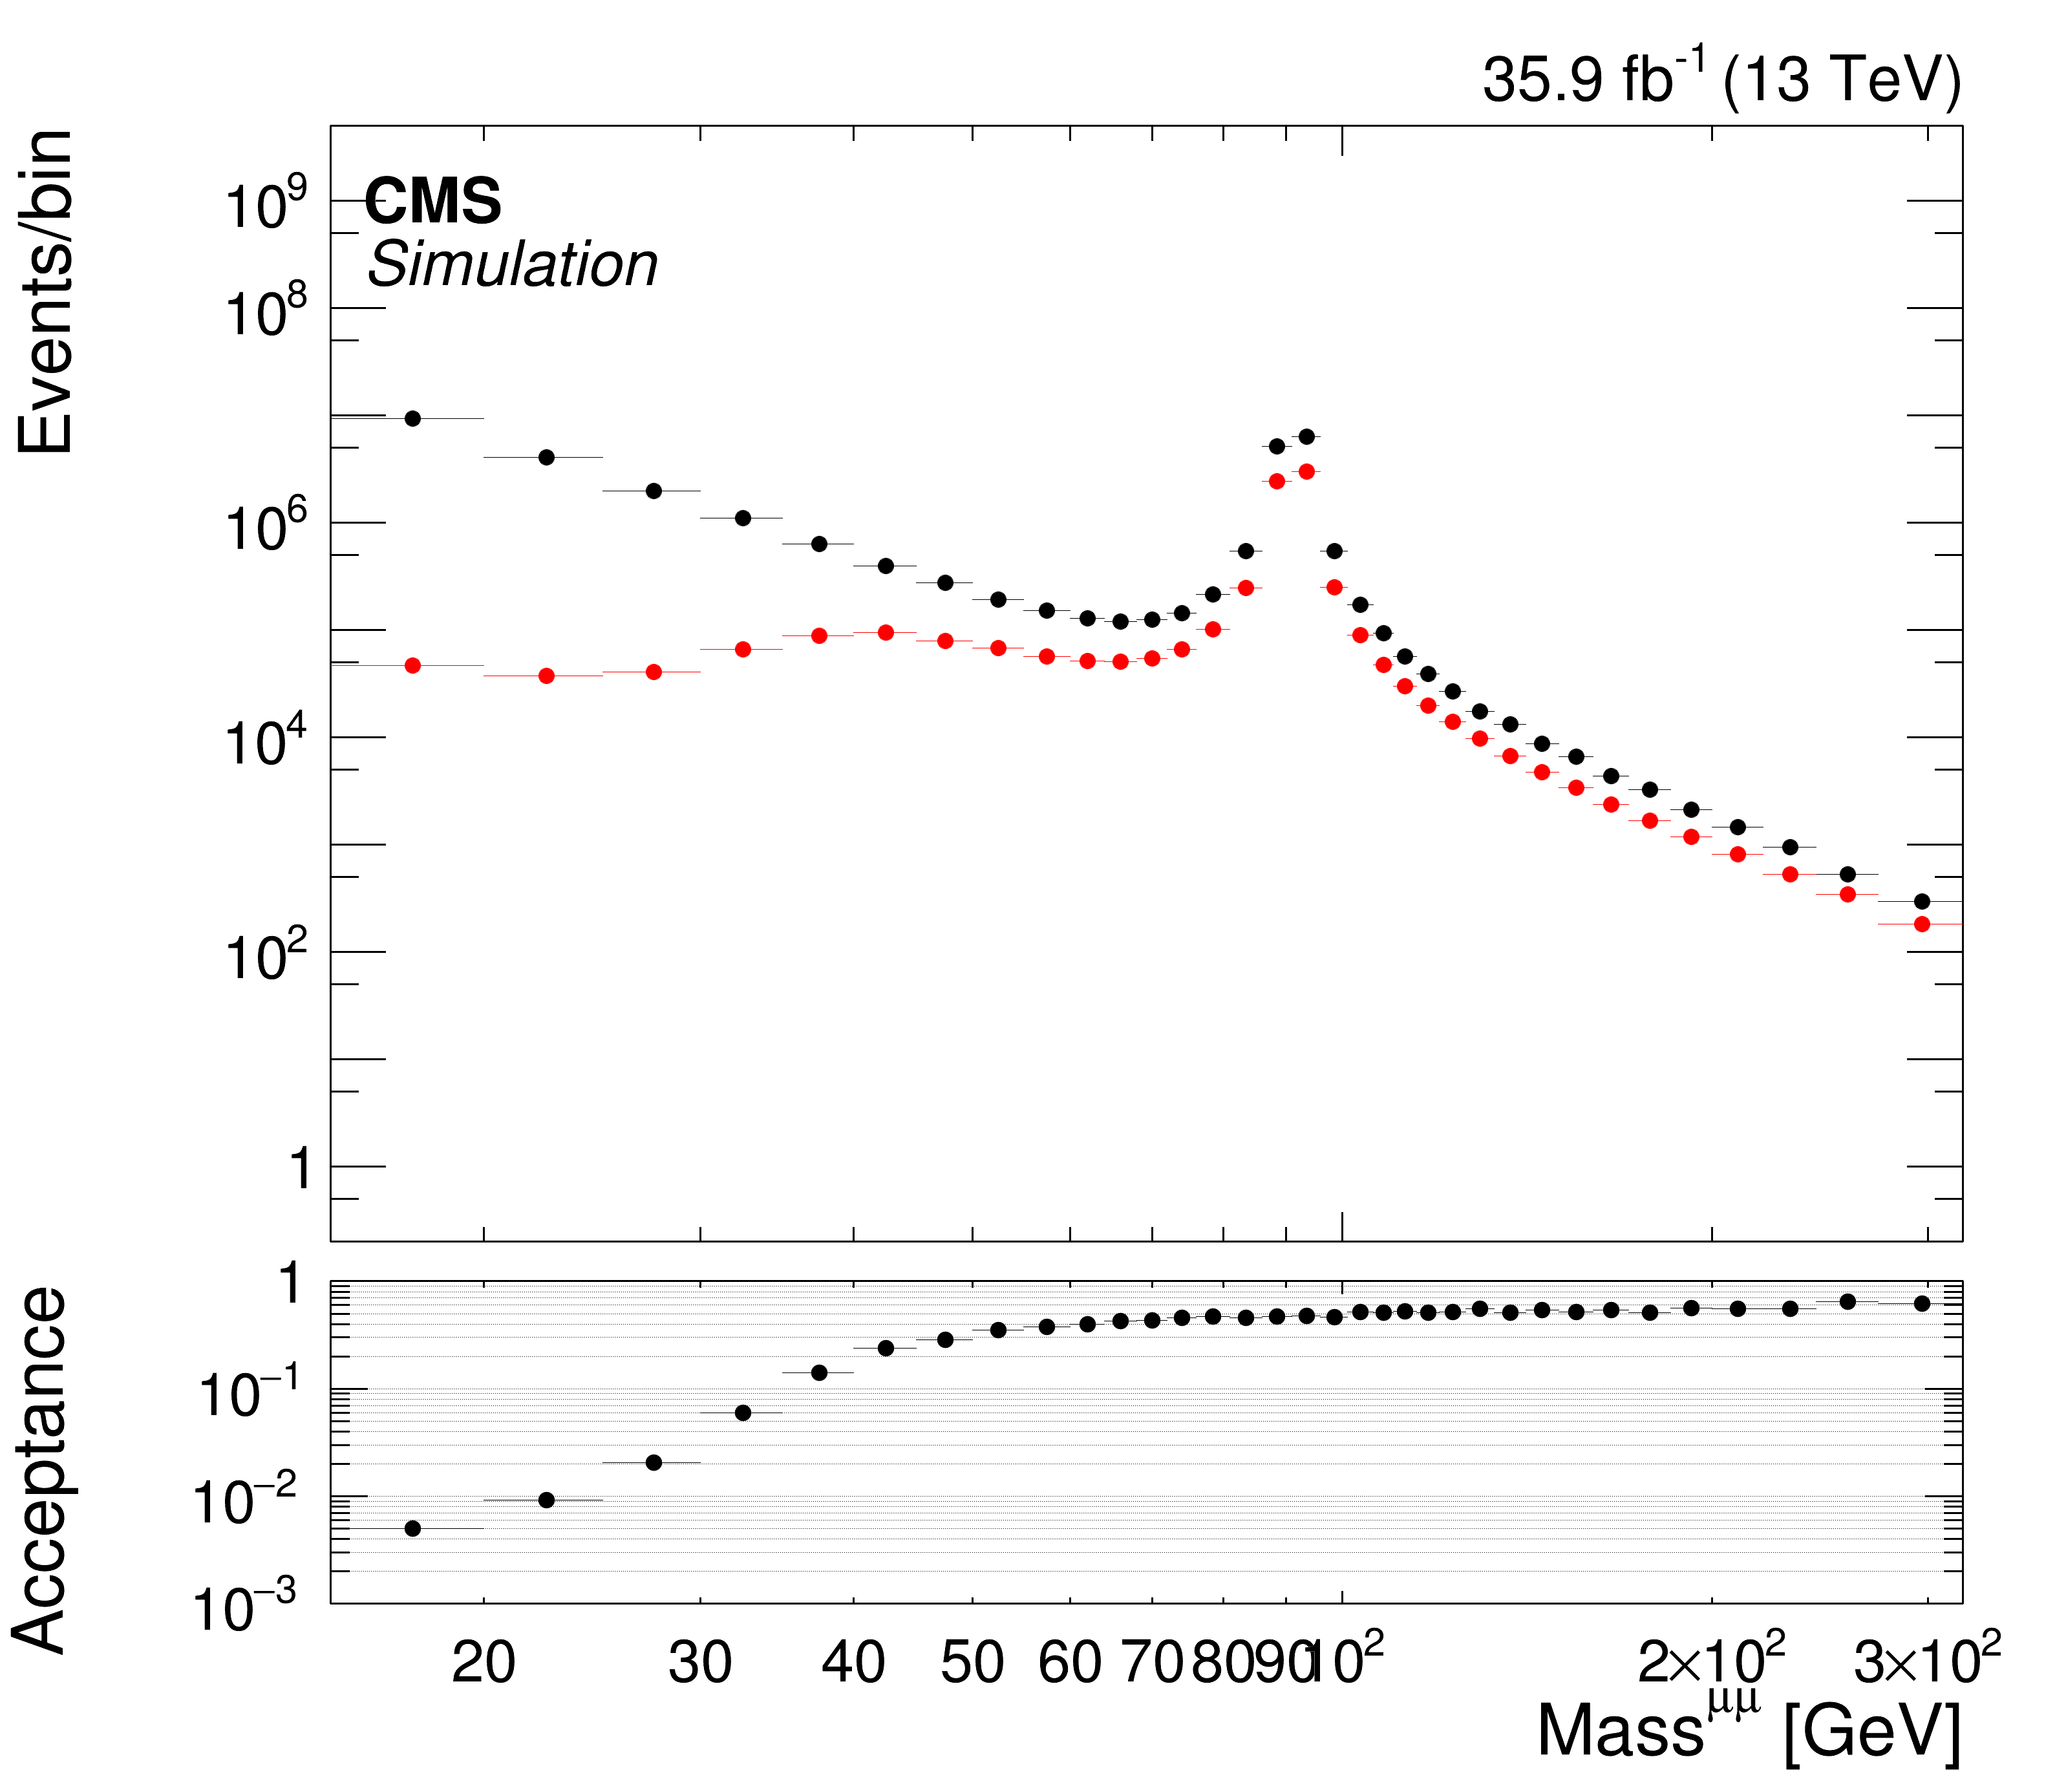

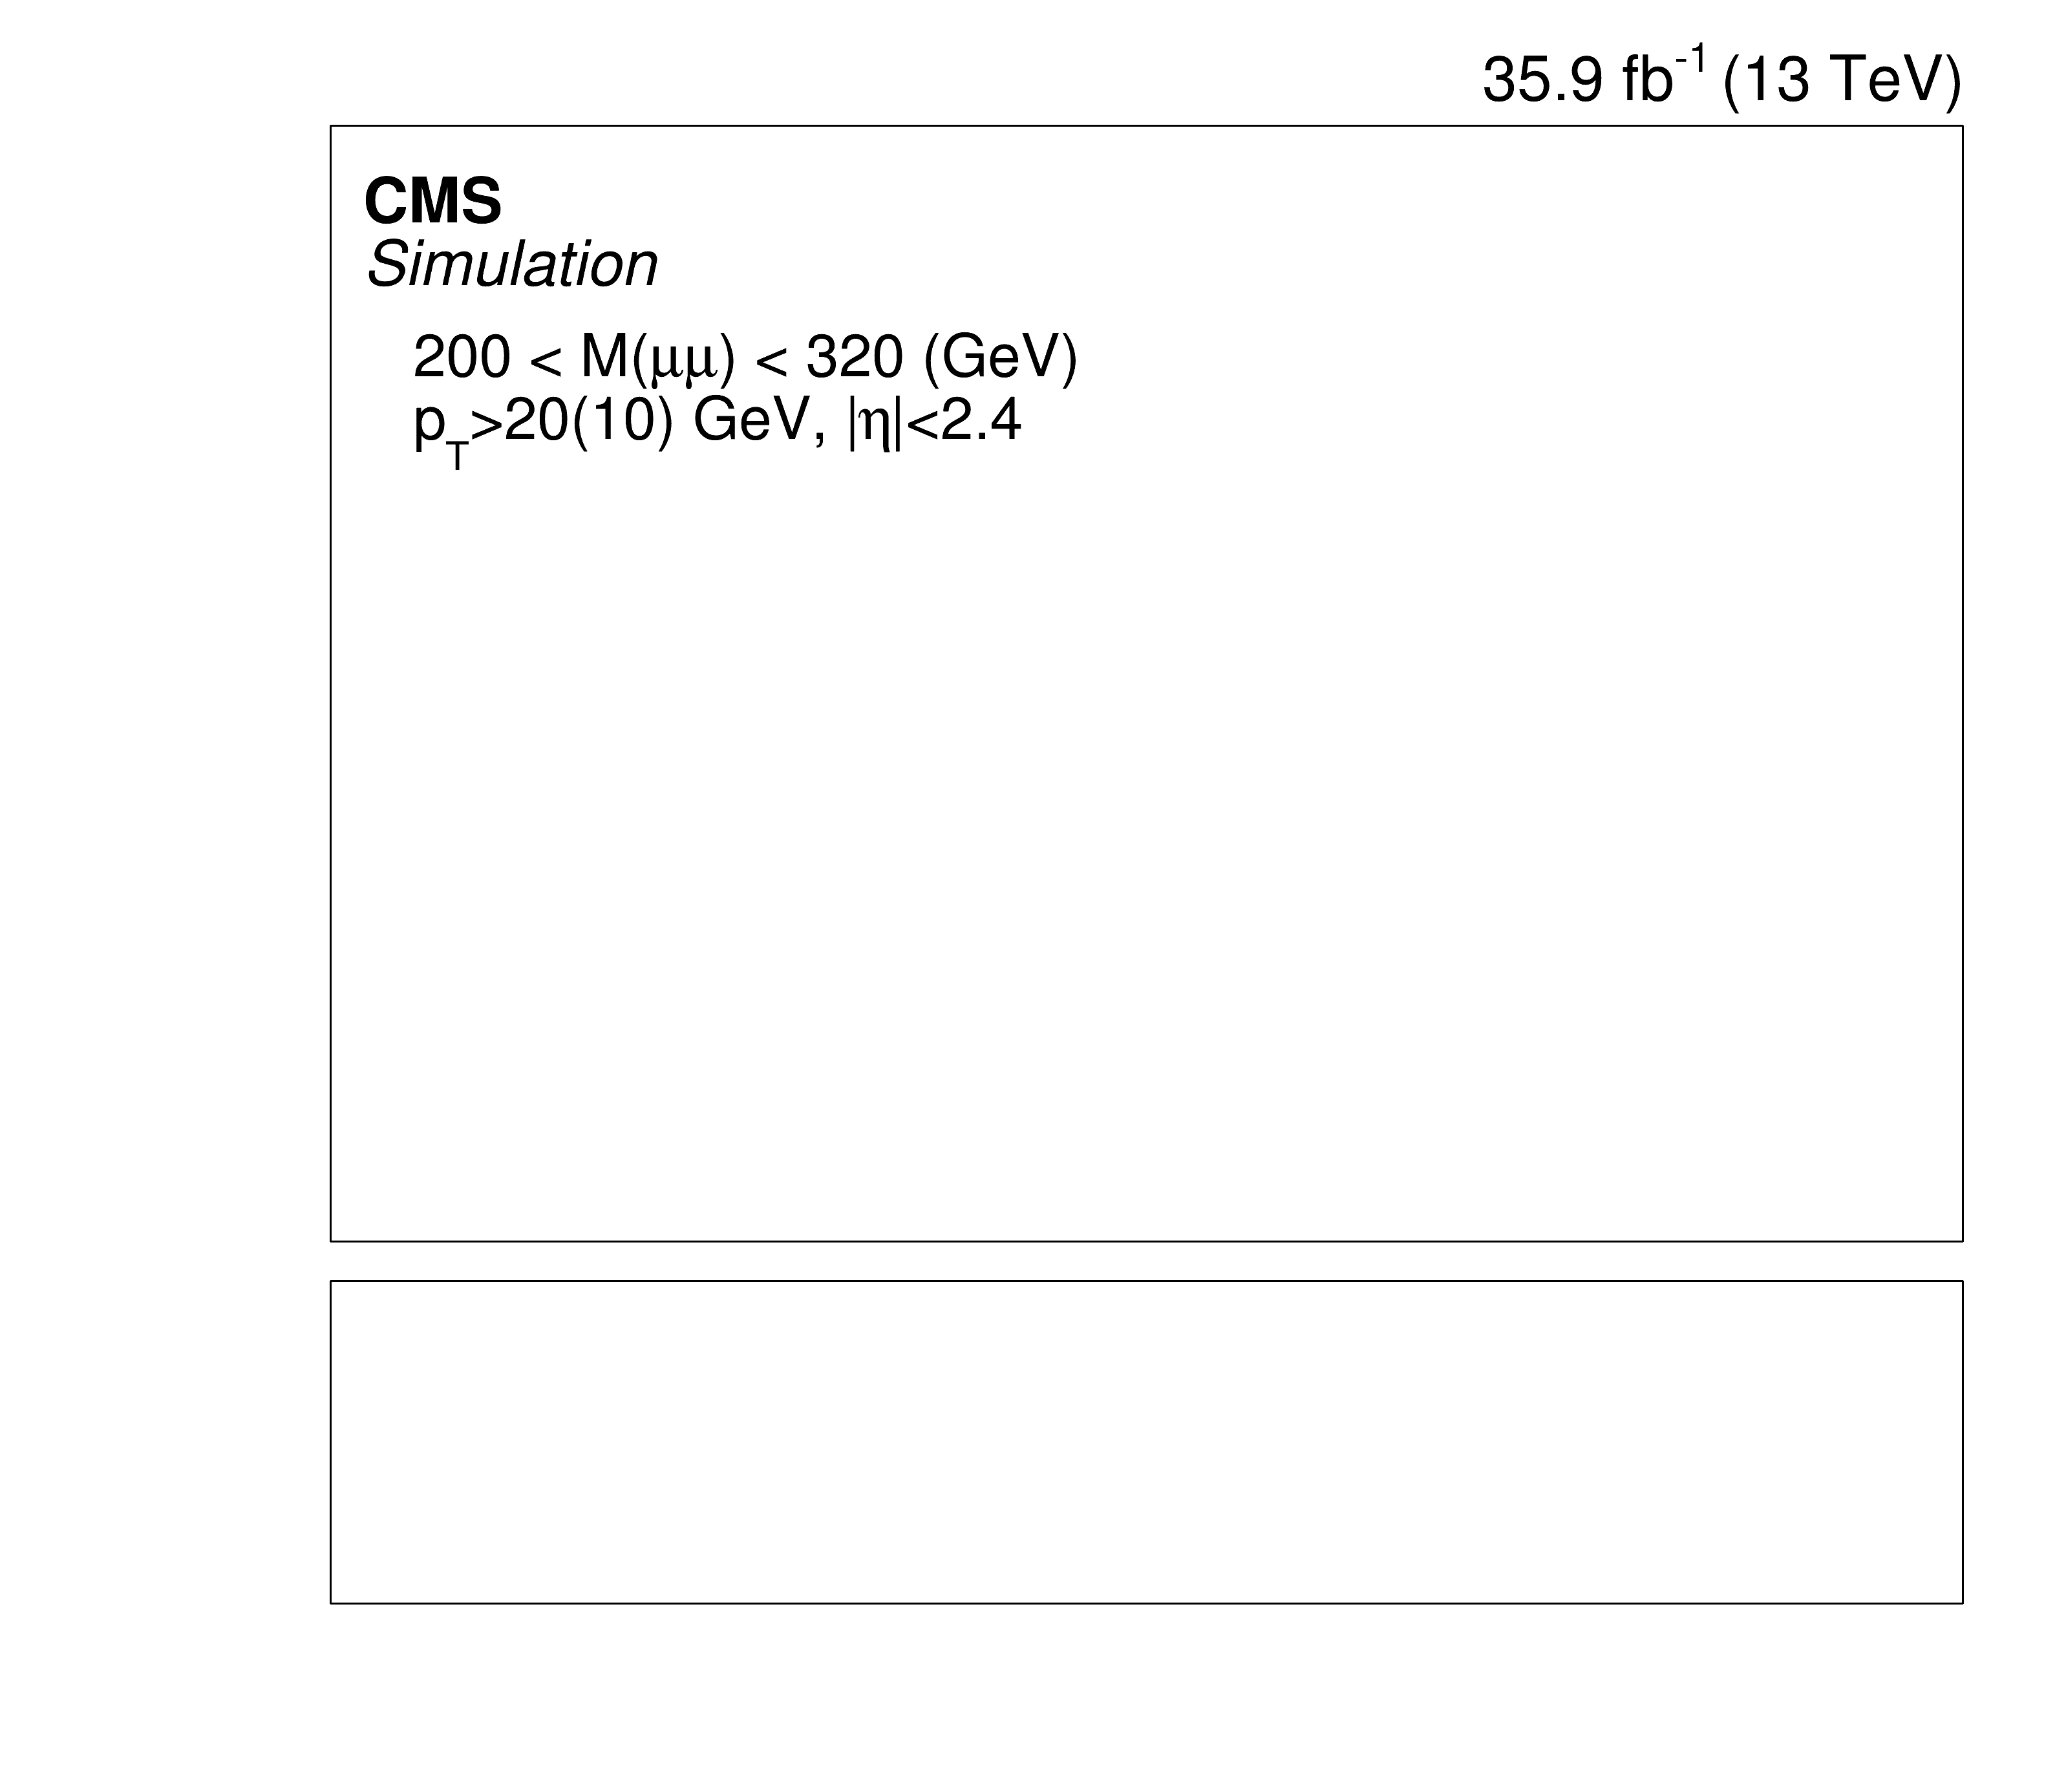

In [25]:
fsrUnfold_muon_2016.doAcceptance(True)

In [26]:
fsrUnfold_muon_2016.setMeanValues()
fsrUnfold_muon_2016.setSysMeanValues()
fsrUnfold_muon_2016.setSysError()
fsrUnfold_muon_2016.setTotSysError()

ISRUnfold::setMeanMass()   Save mean of dilepton...
ISRUnfold::setMeanPt()   Save mean of dilepton momentum...
ISRUnfold::setSysMeanMass()   Save mean of dilepton...
Unfold for AlphaS systematic.
2 systematic variation exist.
Unfold for ID systematic.
2 systematic variation exist.
Unfold for LepMom systematic.
2 systematic variation exist.
Unfold for PU systematic.
2 systematic variation exist.
Unfold for Scale systematic.
6 systematic variation exist.
Unfold for TRG systematic.
2 systematic variation exist.
ISRUnfold::setSysMeanPt()   Save mean of dilepton momentum...
Unfold for AlphaS systematic.
2 systematic variation exist.
AlphaS AlphaSUp 16.8595
AlphaS AlphaSUp 19.2996
AlphaS AlphaSUp 20.6951
AlphaS AlphaSUp 22.4562
AlphaS AlphaSUp 26.891
AlphaS AlphaSDown 16.8709
AlphaS AlphaSDown 19.3107
AlphaS AlphaSDown 20.6917
AlphaS AlphaSDown 22.4764
AlphaS AlphaSDown 27.0026
Unfold for ID systematic.
2 systematic variation exist.
ID IdSFUp 16.8486
ID IdSFUp 19.2702
ID IdSFUp 20.6656
ID Id

In [27]:
fsrUnfold_muon_2016.setAcceptMeanValues()
fsrUnfold_muon_2016.setAcceptSysMeanValues()
fsrUnfold_muon_2016.setAcceptSysError()
fsrUnfold_muon_2016.setAcceptTotSysError()

ISRUnfold::setSysMeanMass_Accept()   Save mean of dilepton...
ISRUnfold::setSysMeanPt_Accept()   Save mean of dilepton momentum...
AlphaS AlphaSUp 13.7899
AlphaS AlphaSUp 17.078
AlphaS AlphaSUp 18.7491
AlphaS AlphaSUp 20.6423
AlphaS AlphaSUp 25.7351
AlphaS AlphaSDown 13.802
AlphaS AlphaSDown 17.0882
AlphaS AlphaSDown 18.7462
AlphaS AlphaSDown 20.6595
AlphaS AlphaSDown 25.84
ID IdSFUp 13.7816
ID IdSFUp 17.0521
ID IdSFUp 18.7238
ID IdSFUp 20.6164
ID IdSFUp 25.7281
ID IdSFDown 13.7658
ID IdSFDown 17.085
ID IdSFDown 18.7712
ID IdSFDown 20.6673
ID IdSFDown 25.8053
LepMom NoLepMomCorr 13.7651
LepMom NoLepMomCorr 17.0915
LepMom NoLepMomCorr 18.7217
LepMom NoLepMomCorr 20.6284
LepMom NoLepMomCorr 25.7575
LepMom Nominal 13.7737
LepMom Nominal 17.0685
LepMom Nominal 18.7474
LepMom Nominal 20.6417
LepMom Nominal 25.7669
PU PUUp 13.7713
PU PUUp 17.056
PU PUUp 18.7432
PU PUUp 20.6366
PU PUUp 25.7788
PU PUDown 13.7772
PU PUDown 17.0834
PU PUDown 18.7516
PU PUDown 20.6484
PU PUDown 25.7596
Scale Scal

In [28]:
gr_2016_muon_det_unfold =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf")
gr_2016_muon_det_unfold_sys =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDetUnf",True,False,True)

In [29]:
gr_2016_muon_det =  detUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False)

In [34]:
gr_2016_muon_accept =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonDet", False,True,True)

In [35]:
gr_2016_muon_fsr =  fsrUnfold_muon_2016.getPtVsMassTGraph("2016MuonFSR", True,False,True)

Chi2:  2.99641609773221
35.9 fb^{-1} (13 TeV)
 FCN=0.786164 FROM MIGRAD    STATUS=CONVERGED      64 CALLS          65 TOTAL
                     EDM=4.14388e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -8.90739e+00   7.43580e-01   2.65763e-05  -6.17778e-04
   2  p1           3.28002e+00   8.38742e-02   2.99774e-06  -8.88785e-03
 FCN=2.99642 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=4.41672e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.72427e+01   6.10587e-01   3.58184e-05  -2.47872e-04
   2  p1           3.98475e+00   6.92630e-02   4.06312e-06  -2.21534e-03


Warning in <TCanvas::Constructor>: Deleting canvas with same name: PtVsMass_detector
Info in <TCanvas::Print>: png file Run2_detector.png has been created


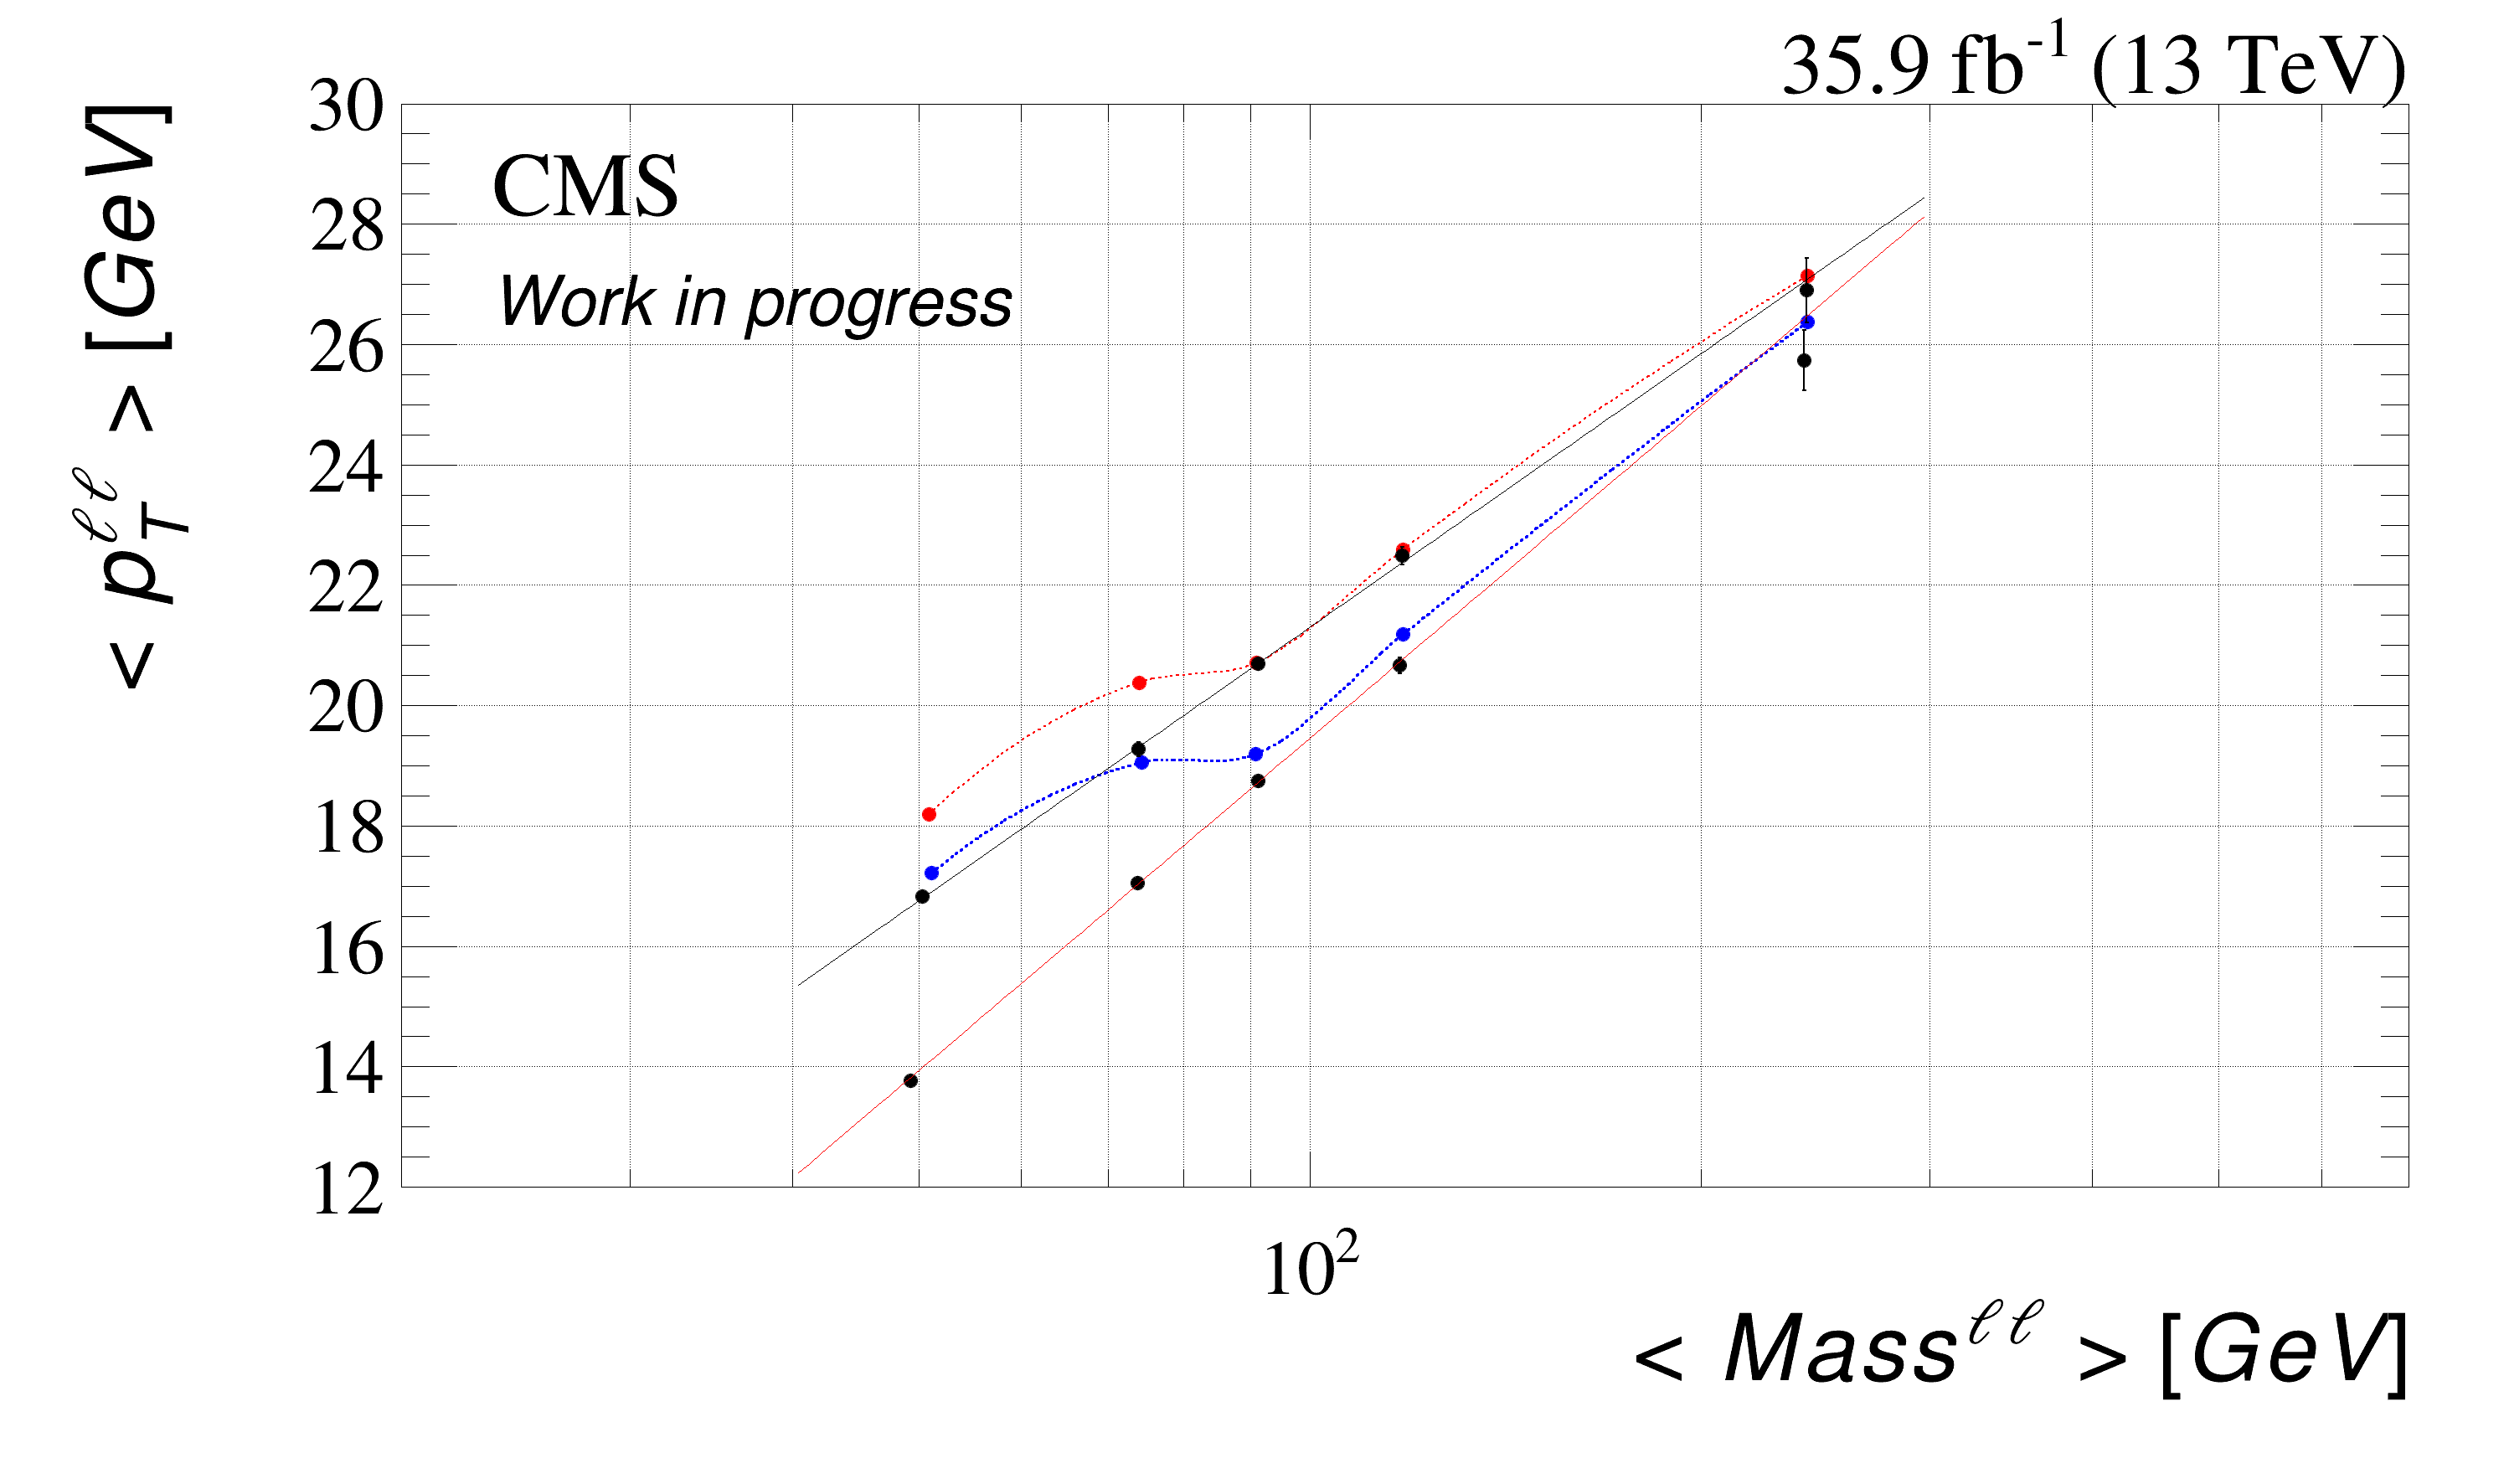

In [42]:
import pyScripts.tdrStyle as tdrStyle
import pyScripts.CMS_lumi as CMS_lumi
import ROOT as rt
markerSize = 2.0

tdrStyle.setTDRStyle()
rt.gStyle.SetOptFit(0)

c_PtVsMass_detector = rt.TCanvas("PtVsMass_detector","PtVsMass_detector", 3000, 1800)
c_PtVsMass_detector.SetGridx()
c_PtVsMass_detector.SetGridy()
c_PtVsMass_detector.SetLogx()
c_PtVsMass_detector.SetBottomMargin(0.2)
c_PtVsMass_detector.SetTopMargin(0.07)

gr_2016_muon_det.SetTitle("2016, 2017, 2018 Detector level")
gr_2016_muon_det.Draw("APC")
gr_2016_muon_det.GetYaxis().SetRangeUser(12., 30.)
gr_2016_muon_det.GetXaxis().SetLimits(20., 700.)
gr_2016_muon_det.SetMarkerStyle(20)
gr_2016_muon_det.SetLineStyle(2)
gr_2016_muon_det.SetMarkerSize(markerSize)
gr_2016_muon_det.SetMarkerColor(rt.kBlue)
gr_2016_muon_det.SetLineColor(rt.kBlue)
gr_2016_muon_det.GetYaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetXaxis().SetTitleOffset(1.0)
gr_2016_muon_det.GetYaxis().SetTitle("<p^{\ell\ell}_{T}> [GeV]")
gr_2016_muon_det.GetXaxis().SetTitle("<Mass^{\ell\ell}> [GeV]")

gr_2016_muon_det_unfold.Draw("PC SAME")
gr_2016_muon_det_unfold.SetLineWidth(2)
gr_2016_muon_det_unfold.SetMarkerColor(rt.kRed)
gr_2016_muon_det_unfold.SetLineStyle(2)
gr_2016_muon_det_unfold.SetMarkerSize(markerSize)
gr_2016_muon_det_unfold.SetLineColor(rt.kRed)

#gr_2016_muon_det_unfold_sys.Draw("E SAME")
gr_2016_muon_det_unfold_sys.SetLineWidth(2)
gr_2016_muon_det_unfold_sys.SetMarkerColor(rt.kBlack)
gr_2016_muon_det_unfold_sys.SetLineColor(rt.kBlack)

gr_2016_muon_accept.Draw("P SAME")
gr_2016_muon_accept.SetLineWidth(2)
gr_2016_muon_accept.SetMarkerSize(markerSize)
gr_2016_muon_accept.SetMarkerColor(rt.kBlack)
gr_2016_muon_accept.SetLineColor(rt.kBlack)

gr_2016_muon_fsr.Draw("P SAME")
gr_2016_muon_fsr.SetLineWidth(2)
gr_2016_muon_fsr.SetMarkerSize(markerSize)
gr_2016_muon_fsr.SetMarkerColor(rt.kBlack)
gr_2016_muon_fsr.SetLineColor(rt.kBlack)

fitLinear1 = rt.TF1("f_1", "[0]+2.*[1]*log(x)", 40., 300.);
fitLinear1.SetLineStyle(1)
fitLinear1.SetLineColor(rt.kBlack)
fitLinear1.SetLineWidth(1)
gr_2016_muon_fsr.Fit(fitLinear1, "R0")
fitLinear1.Draw("same")

fitLinear2 = rt.TF1("f_2", "[0]+2.*[1]*log(x)", 40., 300.);
fitLinear2.SetLineStyle(1)
fitLinear2.SetLineColor(rt.kRed)
fitLinear2.SetLineWidth(1)
gr_2016_muon_accept.Fit(fitLinear2, "R0")
fitLinear2.Draw("same")
print("Chi2: ", fitLinear2.GetChisquare())

CMS_lumi.extraText = "Work in progress"
CMS_lumi.CMS_lumi(c_PtVsMass_detector, 4, 11)
c_PtVsMass_detector.Draw()
c_PtVsMass_detector.SaveAs("Run2_detector.png")